In [1]:
#<img src="fake or real job.png" style="height: 300px; width: 500px;">

## Real OR Fake job postings
The project aims to develop a classification model to distinguish between real and fake job postings using a dataset containing 18K job descriptions, including approximately 800 fraudulent ones. The dataset includes both textual data (job descriptions) and meta-information about the jobs. The goal is to leverage Natural Language Processing (NLP), Machine Learning (ML), and predictive modeling techniques to identify fraudulent job postings and uncover key traits or features that differentiate them from legitimate ones. The project will involve data preprocessing, feature engineering, model training, evaluation, and optimization, with a focus on interpretability and actionable insightjob postings, ensuring a safer and more reliable job-seeking experiencens:

### Business Understanding:
#### Overview:
Fraudulent job postings pose a significant risk to job seekers, companies, and online job platforms. These fake postings can lead to financial losses, identity theft, and reputational damage. By building a robust classification model, businesses can automate the detection of fraudulent job postings, enhance platform credibility, and protect users from potential scams.

#### Objectives:
1. Predictive Modeling: Develop a classification model to predict whether a job posting is real or fake using textual and meta-features.
2. Feature Identification: Identify key traits, phrases, or patterns in job descriptions that are indicative of fraudulent postings.
4. Exploratory Data Analysis (EDA): Perform EDA to uncover insights, trends, and correlations within the dataset.
5. Model Interpretability: Ensure the model's predictions are interpretable, enabling stakeholders to understand the reasoning behind flagged postings.
6. Optimization: Optimize the model for performance, scalability, and accuracy using pipelines and hyperparameter tuning.

#### Key Components:
1. Predictive Modeling:
- Use supervised learning techniques (e.g., Logistic Regression, Random Forest, XGBoost, or Deep Learning models) to classify job postings as real or fake.
- Incorporate both textual features (e.g., TF-IDF, word embeddings) and meta-features (e.g., job title, location, salary) into the model.

2. NLP Pipelines:

- Preprocess textual data using tokenization, stemming/lemmatization, and stopword removal.
- Extract features using techniques like TF-IDF, Bag of Words
- Perform entity recognition to identify key terms (e.g., company names, locations) that may indicate fraud.

3. Machine Learning Pipelines:

- Build end-to-end ML pipelines to automate data preprocessing, feature extraction, and model training.
- Use tools such as Scikit-learn and TensorFlow for model development.

4. Model Evaluation and Optimization:

- Evaluate model performance using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Optimize hyperparameters using techniques like Grid Search and Bayesian Optimization.
- Address class imbalance (800 fake vs. 17K real postings) using techniques like class weighting.

5. Success Metrics:

- Primary metric: F1-score (to balance precision and recall, given the imbalanced dataset).
- Secondary metrics: Accuracy, Precision, Recall, and AUC-ROC.
- Business metric: Reduction in fraudulent job postings on the platform.


6. Model Interpretability:

- Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to explain model predictions.
- Identify the most influential features (e.g., specific words, phrases, or meta-features) contributing to the classification of a job posting as fake.


### Inspiration and Business Value:

The project addresses critical business needs by:
1. Protecting job seekers from fraudulent postings.
2. Enhancing the credibility and trustworthiness of job platforms.
3. Providing actionable insights into the characteristics of fake job postings.
4. Enabling proactive measures to detect and remove fraudulent content.
5. By combining NLP, ML, and interpretable AI, this project delivers a scalable and effective solution for identifying fake job postings, ensuring a safer and more reliable job-seeking experience.

### 1. Data Preparation
##### Import the Libraries

In [2]:
# Import the libraries
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier
import re
import nltk
# nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
from wordcloud import WordCloud

#### 1.1 Load the Dataset
Extract contents from a zipped file containing job postings data, and read the CSV file into a pandas DataFrame

In [3]:
# Extract the zip file
with ZipFile("Real or Fake Job Postings.zip", 'r') as f:
    f.extractall()

# Read the CSV file as a single column
fakejobs_postings_df = pd.read_csv("fake_job_postings.csv")
fakejobs_postings_df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


#### 1.2 Initial Dataset Exploration
Display the number of rows and columns in the dataset and list all the column names in the dataset.

In [4]:
# check the shape of the dataset
print(f'The shape of the dataset is {fakejobs_postings_df.shape}')

print(fakejobs_postings_df.columns)

print(f'The Target Variable if Fraudulent')

The shape of the dataset is (17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')
The Target Variable if Fraudulent


#### 1.3 Handle missing values
calculate the percentage of missing values for each column to understand the quality of the dataset.

In [5]:
# Determine the number of rows with missing data
(fakejobs_postings_df.isnull().sum()[fakejobs_postings_df.isnull().sum() > 0] / len(fakejobs_postings_df) * 100).round(2)

location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.08
benefits               40.34
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
dtype: float64

##### Insights
Columns with more than 60% missing data (such as column 4 with 83.96% and column 3 with 64.58%) are a concern. 
All other columns will be imputed with appropriate strategies (median for numerical columns, and mode imputation for categorical columns)

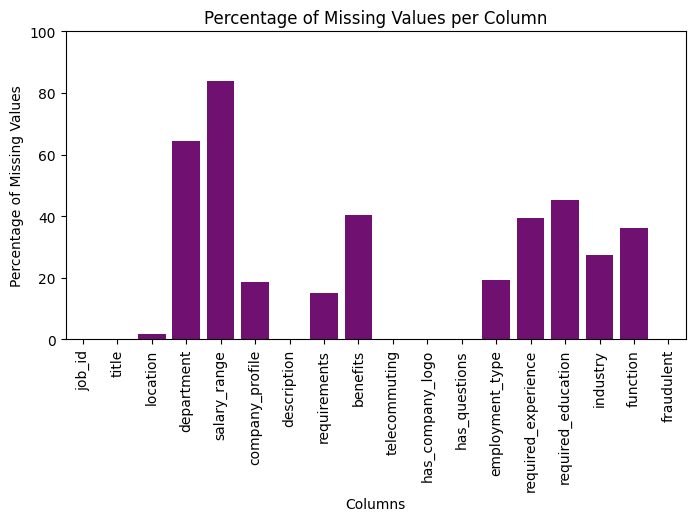

In [6]:
# Calculate the percentage of missing values for each column
missing_data_percentage = fakejobs_postings_df.isnull().mean() * 100

# Create a barplot to visualize the percentage of missing values
plt.figure(figsize=(8,4))
sns.barplot(x=missing_data_percentage.index, y=missing_data_percentage.values, color='purple')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')

# Set y-axis limit from 0 to 100
plt.ylim(0, 100)

plt.show()

##### Insights
The bar graph above visualizes the percentage of missing values

#### 1.4. Data cleaning and Preprocessing
Data cleaning and preprocessing steps below to ensure it is ready for analysis. Unnecessary columns like 'job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', and 'employment_type' are dropped. Missing values in categorical columns are filled with an empty string (' '), while missing values in numerical columns are replaced with the mode of that column. Additionally, rows with missing values in the target variable 'fraudulent' are removed.

In [7]:
# Drop columns that are not necessary in the analysis
columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
fakejobs_postings_df.drop(columns=columns, inplace=True)

# Fill missing values in categorical columns with 'N/A' and numerical columns with mode
for column in fakejobs_postings_df.columns:
    if fakejobs_postings_df[column].dtype == 'object':  # Categorical column
        fakejobs_postings_df[column] = fakejobs_postings_df[column].fillna(' ')  # Fill ' '
    else:  # Numerical column
        fakejobs_postings_df[column] = fakejobs_postings_df[column].fillna(fakejobs_postings_df[column].mode()[0])  # Fill with mode

# Further handling missing data and preprocessing
# Ensure there are no rows with missing target variable
fakejobs_postings_df.dropna(subset=['fraudulent'], inplace=True)

# Check for any remaining missing values and handle
fakejobs_postings_df.isnull().sum()


fakejobs_postings_df.head(2)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0


##### 1.5. Categorical and Numerical columns
Check the data types of the columns in the dataset.

In [8]:
# Identify categorical columns (dtype = object or category)
categorical_columns = fakejobs_postings_df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:", categorical_columns)

# Identify categorical columns (dtype = object or category)
numerical_columns = fakejobs_postings_df.select_dtypes(include=['float64', 'int64']).columns

print("numerical columns:", numerical_columns)

Categorical columns: Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function'],
      dtype='object')
numerical columns: Index(['fraudulent'], dtype='object')


### 2. Exploratory Data Analysis (EDA)

##### 2.1. Visualizing the Distribution of the Target Variable ('fraudulent')
Visualize the distribution of the target variable, fraudulent, which likely indicates whether a job posting is fraudulent or not.

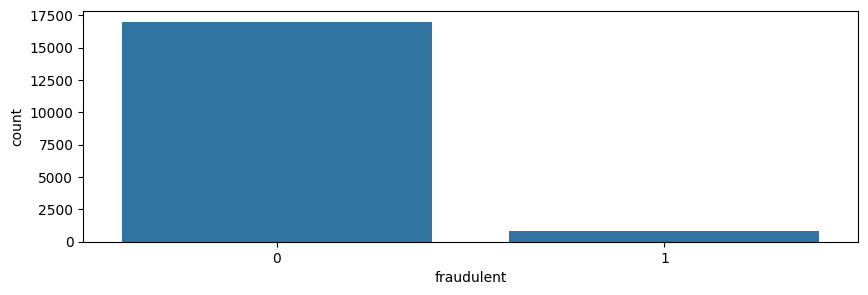

In [9]:
# Plot the distribution of the target variable 'fraudulent'
plt.figure(figsize=(10,3))  
sns.countplot(x='fraudulent', data=fakejobs_postings_df)

# Show the count of titles grouped by 'fraudulent', sorted by title count
fraudulent_counts = fakejobs_postings_df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title', ascending=False)

# Show the plot
plt.show()


##### 2.2. Extracting Country Information and Visualizing Job Postings by Country
Extract country information from the location column and visuale the distribution of job postings by country.
Use a bar plot to visualize the top 10 countries with the most job postings. 

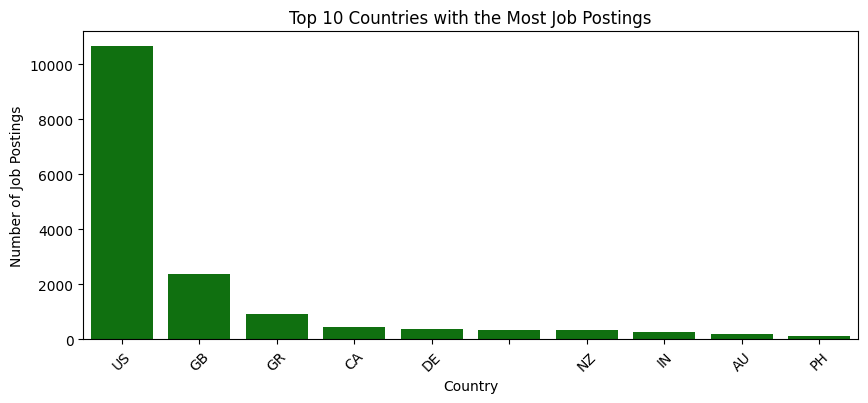

In [10]:
# Extract country from the location column
fakejobs_postings_df['country'] = fakejobs_postings_df['location'].str.split(',').str[0].str.strip()

# Count the number of job postings per country
country_counts = fakejobs_postings_df['country'].value_counts()

# Plot the results
plt.figure(figsize=(10, 4))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, color='green')  # Changed 'colour' to 'color'
plt.title('Top 10 Countries with the Most Job Postings')
plt.xlabel('Country')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()


##### Insights
The USA and Great Britain have the most job postings

##### 2.3. Visualizing Experience Requirements in Job Postings
Count and visualize the most common experience requirements in job postings.

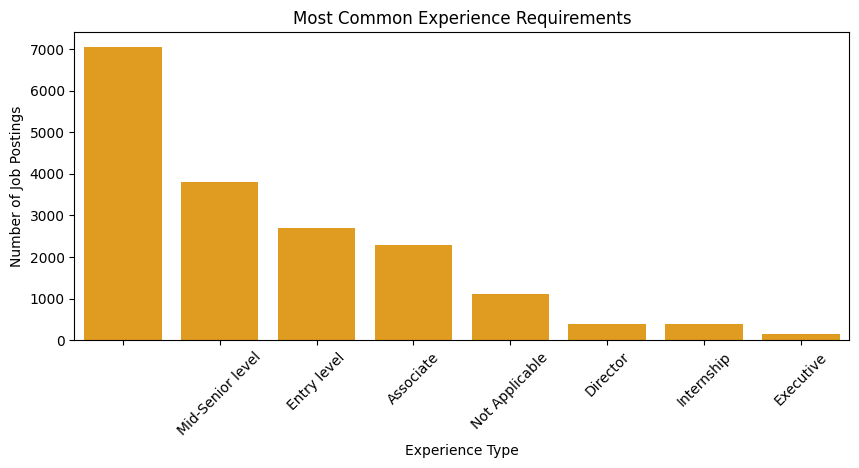

In [11]:
# Count the occurrences of each experience type
experience_counts = fakejobs_postings_df['required_experience'].value_counts()

# Plot the results
plt.figure(figsize=(10, 4))
sns.barplot(x=experience_counts.index, y=experience_counts.values, color='orange')
plt.title('Most Common Experience Requirements')
plt.xlabel('Experience Type')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

##### Insights
In the advertised job positions, the most experience type required is: mid-senior level, entry leve, associate, director, internship and executive in that order

##### 2.4. Analyzing the Most Common Job Titles
Identify and display the most common job titles in the dataset with a  Word Cloud.

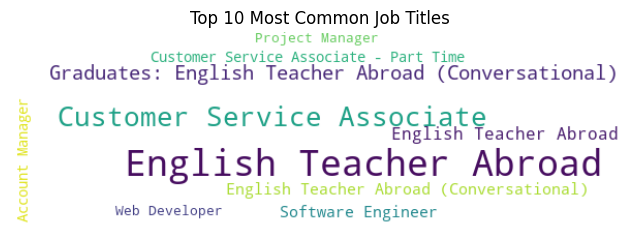

In [12]:
# Count the occurrences of each job title and get the top 10
title_counts = fakejobs_postings_df['title'].value_counts().head(10)

# Display as a DataFrame to show it in a table format
title_counts_df = pd.DataFrame(title_counts).reset_index()
title_counts_df.columns = ['Job Title', 'Occurrences']

# Generate a Word Cloud for the top 10 job titles
wordcloud = WordCloud(width=600, height=200, background_color='white').generate_from_frequencies(title_counts.to_dict())

# Display the Word Cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Most Common Job Titles')
plt.show()

##### Insights
The top 10 most common job tittles are: English Teacher Abroad(311),  Customer Service Associat( 14),2  Graduates: English Teacher Abro (  1),     Software Engi(  ),      English Teacher Abr  ),       Customer Service Associate - Par(  ),        Account (  ),         Web D(  ), and          Project Manager

### 3. Data Preprocessing

#### 3.1. Combining Text-Based Columns for Further Analysis
Combine multiple text-based columns into a single column for easier text analysis.Use the apply() function along with a lambda function to concatenate the values of all text columns for each row.

In [13]:
# List of text-based categorical columns to clean
text_columns = [
    'title', 'country', 'location', 'department', 'company_profile', 'description', 
    'requirements', 'benefits', 'required_experience', 'required_education',
    'industry', 'function'
]

# Combine relevant text columns into one column for further analysis
fakejobs_postings_df['combined_text'] = fakejobs_postings_df[text_columns].apply(
    lambda row: ' '.join(row.astype(str)), axis=1
)

# Display the first few rows of the modified dataframe
fakejobs_postings_df.head(2)

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country,combined_text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US,"Marketing Intern US US, NY, New York Marketing..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production NZ N...


#### 3.2.Text Preprocessing: Tokenization, Stopword Removal, and Stemming
Standardize the text data and prepare it for further natural language processing (NLP):

- Initialize the RegexpTokenizer to tokenize the text into words
- Remove Stopwords (common words such as "and," "the," "is," etc.)
- Apply Stemming to reduce words to their root form using the PorterStemmer. 

In [ ]:
# Initialize the RegexpTokenizer (tokenizes on words)
tokenizer = RegexpTokenizer(r'\w+')

# Necessary stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):  
        # Remove special characters, punctuation, and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize into words
        tokens = tokenizer.tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Apply stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        return tokens
    
# List of text-based categorical columns to clean
text_columns = [
    'title', 'country', 'location', 'department', 'company_profile', 'description', 
    'requirements', 'benefits', 'required_experience', 'required_education',
    'industry', 'function'
]

# Apply text cleaning to each of the text-based categorical columns
for col in text_columns:
    fakejobs_postings_df[f'cleaned_{col}'] = fakejobs_postings_df[col].apply(preprocess_text)


# Drop the original columns to keep only the cleaned ones
#fakejobs_postings_df = fakejobs_postings_df.drop(columns=text_columns)

fakejobs_postings_df.head(2)

#### 3.3. Combining Cleaned Text Columns and Transforming with TF-IDF Vectorizer

This step involves combining the cleaned text-based columns into one column and then transforming that text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

In [ ]:
# List of cleaned text-based columns to combine
text_features = [
    'cleaned_title', 'cleaned_location', 'cleaned_department', 
    'cleaned_company_profile', 'cleaned_description', 
    'cleaned_requirements', 'cleaned_benefits', 
    'cleaned_required_experience', 'cleaned_required_education',
    'cleaned_industry', 'cleaned_function'
]

# Combine relevant text columns into one column for further analysis
fakejobs_postings_df['clean_combined_text'] = fakejobs_postings_df[text_features].apply(
    lambda row: ' '.join([' '.join(tokens) for tokens in row]), axis=1
)

# Now transform the combined_text column using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit the number of features for better performance
X_text = tfidf.fit_transform(fakejobs_postings_df['clean_combined_text'])

#### 3.4. Word Cloud for Fraudulent Job Postings
This code block focuses on visualizing the most common terms in fraudulent job postings using a Word Cloud.

In [ ]:
fake = fakejobs_postings_df[fakejobs_postings_df['fraudulent']==1]['combined_text']

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

# Create a more refined word cloud with smaller size and simplified styling
wordcloud = WordCloud(width=700, height=400, background_color='white', colormap='Oranges', max_words=120).generate(' '.join(fake))

# Display the Word Cloud
plt.figure(figsize=(12, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('The most common terms in Fraudulent Job postings')
plt.show()

#### 3.5. Text Feature Extraction using TF-IDF
Convert text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000 for better performance

# Transform the combined text into numerical features
X_text = tfidf.fit_transform(fakejobs_postings_df['combined_text'])

# Check the shape of the resulting features
print("Shape of the text features:", X_text.shape)

#### 3.6. Convert Categorical Columns and Combine Features
Here, I handle the transformation of categorical data and combine it with text-based features for use in machine learning models.
- The OneHotEncoder is used to convert categorical columns like location, company_profile, required_experience, etc., into binary features.
- The text-based features (extracted through TF-IDF) are combined with the one-hot encoded categorical features using hstack from scipy.sparse. This creates a combined feature matrix (X_combined) that includes both the text-based and categorical data, ready for model training.

In [ ]:
# Convert categorical columns into numerical values using OneHotEncoder
categorical_columns = ['location', 'company_profile', 'required_experience', 'required_education', 'industry', 'function']
encoder = OneHotEncoder(sparse_output=False)
X_meta = encoder.fit_transform(fakejobs_postings_df[categorical_columns])

# Combine text features (TF-IDF) with meta-features
from scipy.sparse import hstack
X_combined = hstack([X_text, X_meta])

# Target variable
y = fakejobs_postings_df['fraudulent']

#### 3.7. Data Splitting: Train-Test Split
In this section we focus on splitting data into training and test sets, we can now use the training set to train machine learning models and the test set to evaluate the model's performance on unseen data.

In [ ]:
# Train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the train and test datasets
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

## 4. Modeling 
### 4.1 Supervised Learning
In this section, we will apply Supervised Learning techniques to predict whether a job posting is fraudulent or non-fraudulent based on the features we have prepared so far. Since this is a binary classification problem, where the target variable has two classes (fraudulent or not), we will use different classification models to train and evaluate our model's performance.

#### 4.1.1 KNN (K-Nearest Neighbors)
The K-Nearest Neighbors (KNN) algorithm is a simple and effective machine learning technique used for classification tasks. 

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Print the classification report for evaluation
print("KNN Model Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

##### Insights
The accuracy of the model is 98%, meaning that the model correctly predicted the fraudulent or non-fraudulent label for 98% of the test samples.
Class 0 (Non-Fraudulent) Performance:

- Precision(0.99) - The model correctly identified 99% of the non-fraudulent job postings. This means that when the model predicted a job posting as non-fraudulent, it was highly likely to be correct.
- Recall(1.00)- The model perfectly identified all the non-fraudulent job postings in the dataset. It missed none of them, showing that there are no false negatives for class 0.
- F1-Score(0.99) - The high F1-score for class 0 (0.99) indicates that the model has balanced precision and recall for the non-fraudulent class, achieving excellent overall performance.

Class 1 (Fraudulent) Performance:

- Precision(0.88) - The model correctly predicted fraudulent job postings 88% of the time. 
- Recall (0.75) - The model identified 75% of all fraudulent job postings, meaning it missed 25% of them (false negatives). 
- F1-Score(0.81)- The F1-score of 0.81 for the fraudulent class indicates a reasonable balance between precision and recall for this class

#### 4.1.2 Random Forest with GridSearchCV
Here, we optimize a Random Forest model by performing hyperparameter tuning using GridSearchCV. The goal is to identify the best combination of hyperparameters for the RandomForestClassifier, such as n_estimators, max_depth, and min_samples_split. The grid search will test different combinations and select the optimal configuration.

In [ ]:
# Random Forest with GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters for RandomForest:", grid_search_rf.best_params_)

# Predict on the test set using the best model
y_pred_rf = grid_search_rf.predict(X_test)

# Print the classification report for evaluation
print("Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### 4.1.3 XGBoost Model
Here, we apply the XGBoost model to the job posting dataset. XGBoost (Extreme Gradient Boosting) is an advanced machine learning algorithm that is highly effective for classification tasks, especially with large and imbalanced datasets.

In [ ]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Print the classification report for evaluation
print("XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### 4.1.4 Gradient Boosting Model
Gradient Boosting is a powerful ensemble technique that builds models in a stage-wise manner, combining weak learners (usually decision trees) to create a stronger overall model. 

In [ ]:
# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# Print the classification report for evaluation
print("Gradient Boosting Model Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### 4.1.5 Naive Bayes Model (MultinomialNB)
Here, I apply the Multinomial Naive Bayes classifier to the job posting dataset. Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem and is particularly effective when dealing with text data, as it assumes features (words or tokens) are conditionally independent given the class. 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb, recall_nb, f1_nb, _ = classification_report(y_test, y_pred_nb, output_dict=True)['1'].values()
auc_roc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"AUC-ROC: {auc_roc_nb:.4f}")
print("\n" + "-"*50)

# Plot the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### 4.2. Unsupervised Learning
Unsupervised learning is a type of machine learning where the model is not provided with labeled data. Instead, it attempts to find patterns or structure in the data. 

#### 4.2.1 Clustering (KMeans)
Here, we apply KMeans clustering, to partition the data into k clusters based on feature similarities. In this case, we are assuming that job postings can be grouped into two clusters: real and fake job postings.
We visualize the Silhouette Score to get an idea of how well the KMeans algorithm has clustered the job postings.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print(f"Silhouette Score for KMeans clustering: {silhouette_avg:.4f}")

# Compute the silhouette scores for each sample
silhouette_values = silhouette_samples(X_train, kmeans.labels_)

# Sort the silhouette scores in descending order
sorted_silhouette_values = np.sort(silhouette_values)

# Create a figure for the silhouette plot
plt.figure(figsize=(8, 6))

# Create a bar plot for the sorted silhouette scores
plt.barh(range(len(sorted_silhouette_values)), sorted_silhouette_values, color='skyblue')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')  # Add a vertical line for the average silhouette score
plt.xlabel("Silhouette Score")
plt.ylabel("Sample Index")
plt.title("Silhouette Scores for Each Sample in KMeans Clustering")

# Show the plot
plt.show()

#### 4.2.2. PCA (Principal Component Analysis) for Dimensionality Reduction:
PCA helps to reduce the number of features in the dataset while retaining as much variability as possible. Here we reduce the features to 2 principal components (n_components=2), allowing for a 2D visualization of the data.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train.toarray())  # Convert sparse matrix to dense

# Visualize the 2D projection of data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm')
plt.title('PCA - 2D Projection of Job Postings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 5. Model Comparisons
In this section, we will compare the performance of the supervised and unsupervised models we have implemented. The purpose of this comparison is to assess how well each type of model performs on the task of identifying fraudulent job postings, and to understand the differences between supervised learning models and unsupervised learning models in terms of their ability to handle this classification problem.

### 6. Model Training using Neural Network and SGD:
We implement a multi-layer perceptron (MLP) neural network. The training will be based on Stochastic Gradient Descent (SGD).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Define the neural network model using MLPClassifier with SGD optimizer
mlp_sgd = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,), max_iter=300, random_state=42, learning_rate_init=0.01)

# Train the model
mlp_sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp_sgd.predict(X_test)

# Calculate performance metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp, recall_mlp, f1_mlp, _ = classification_report(y_test, y_pred_mlp, output_dict=True)['1'].values()
auc_roc_mlp = roc_auc_score(y_test, mlp_sgd.predict_proba(X_test)[:, 1])

# Display the results
print(f"MLP (SGD) Model:")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1-Score: {f1_mlp:.4f}")
print(f"AUC-ROC: {auc_roc_mlp:.4f}")
print("\n" + "-"*50)


### 6. Model Interpretability (SHAP or LIME)

In [ ]:
import shap

# Using SHAP for Random Forest
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_)  # Random Forest Model
shap_values = explainer.shap_values(X_test.toarray())

# Visualize SHAP values
shap.summary_plot(shap_values[1], X_test.toarray())

### 7. Model Evaluation and Tuning
ensure the selected model (e.g., XGBoost or Random Forest) is tuned and performs well with optimal hyperparameters.

In [ ]:
# Hyperparameter Tuning for XGBoost or Random Forest if needed
# For example, with Random Forest
grid_search_rf_best = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf_best.fit(X_train, y_train)

# Final model evaluation
best_model = grid_search_rf_best.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f"Best Random Forest Model Classification Report:\n{classification_report(y_test, y_pred_best)}")